In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [16]:
df = pd.read_csv("data-kiem-tra-2.csv")
df.head(50)

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1
5,15.05.2013,4,58,12886,148.0,1
6,15.05.2013,4,59,2678,499.5,1
7,26.05.2013,4,59,2458,299.0,1
8,25.05.2013,4,59,2447,1999.0,1
9,15.05.2013,4,59,2447,1998.5,1


In [17]:
df.dtypes

date         object
truong_1      int64
truong_2      int64
truong_3      int64
truong_4    float64
truong_5      int64
dtype: object

In [18]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.dtypes

date        datetime64[ns]
truong_1             int64
truong_2             int64
truong_3             int64
truong_4           float64
truong_5             int64
dtype: object

In [19]:
df = df.groupby('date').sum().reset_index()

In [20]:
df.set_index('date', inplace=True)

In [21]:
train_df = df[:-15]
test_df = df[-15:]


MÔ HÌNH ARIMA

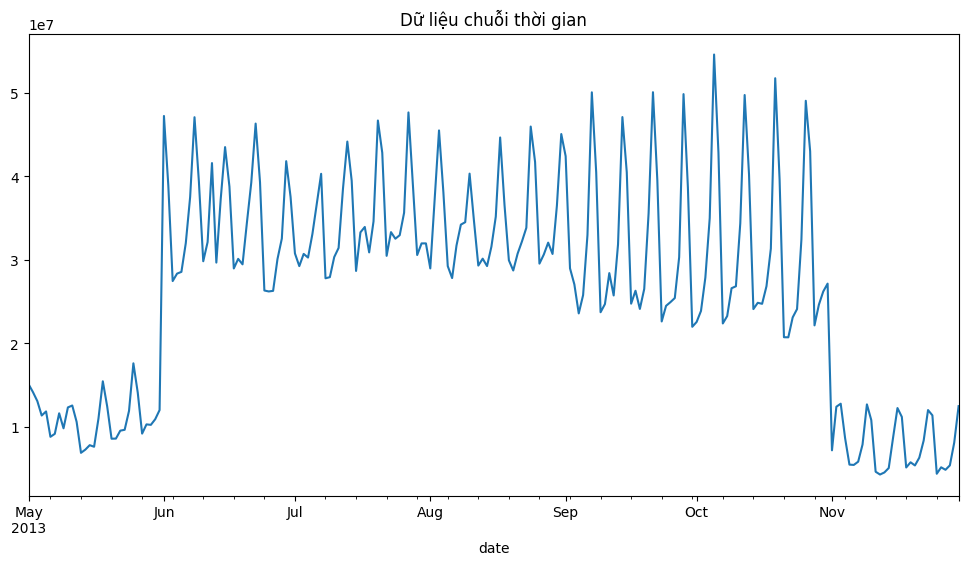

In [22]:
# Trực quan hóa dữ liệu
df['truong_3'].plot(figsize=(12, 6))
plt.title('Dữ liệu chuỗi thời gian')
plt.show()

In [23]:
# Kiểm tra tính dừng bằng kiểm tra Dickey-Fuller mở rộng
result = adfuller(df['truong_3'])
print(f'Thống kê ADF: {result[0]}')
print(f'Giá trị p: {result[1]}')

Thống kê ADF: -1.8800479847552338
Giá trị p: 0.3415045885718311


In [24]:
# Áp dụng lấy sai phân nếu dữ liệu không dừng
df['truong_3_diff'] = df['truong_3'].diff().dropna()

In [25]:

# Tìm mô hình ARIMA tốt nhất bằng auto_arima
model = auto_arima(df['truong_3'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7291.994, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7355.125, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7356.124, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7352.697, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7353.128, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7300.303, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7288.000, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7345.726, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7315.067, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7289.985, Time=0.63 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7315.762, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7310.356, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7285.995, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7343.726, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [26]:
# Thực hiện việc fit mô hình vào dữ liệu
model.fit(df['truong_3'])

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [27]:
# Tóm tắt mô hình
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3638.998
Date:                Tue, 04 Jun 2024   AIC                           7285.995
Time:                        11:04:37   BIC                           7299.440
Sample:                    05-01-2013   HQIC                          7291.429
                         - 11-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6197      0.098      6.310      0.000       0.427       0.812
ar.L2         -0.4543      0.076     -5.976      0.000      -0.603      -0.305
ma.L1         -0.7478      0.078     -9.642      0.0

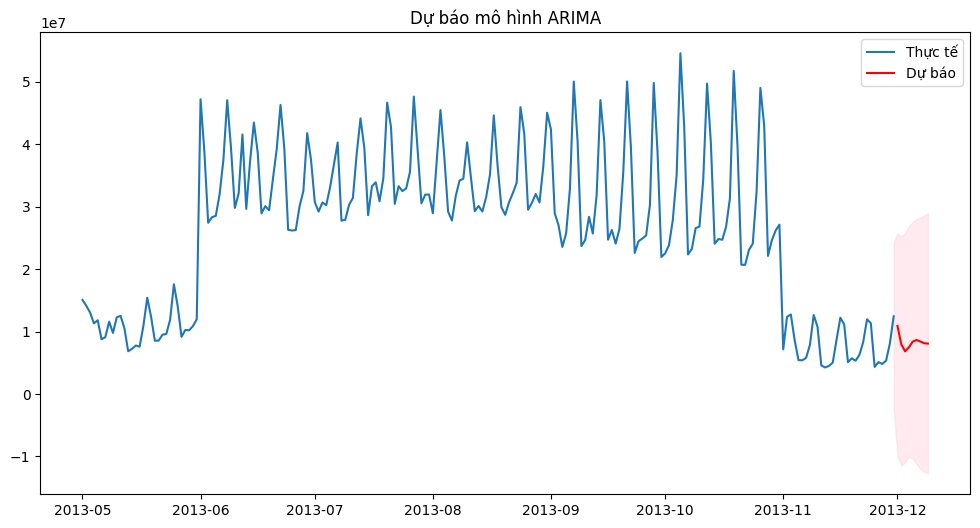

In [29]:
# Dự báo
n_periods = 10  # Số kỳ cần dự báo
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Tạo DataFrame cho các giá trị dự báo
forecast_dates = pd.date_range(start=df.index[-1], periods=n_periods, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Dự báo'])

# Vẽ đồ thị các giá trị dự báo
plt.figure(figsize=(12, 6))
plt.plot(df['truong_3'], label='Thực tế')
plt.plot(forecast_df, label='Dự báo', color='red')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Dự báo mô hình ARIMA')
plt.legend()
plt.show()

MÔ HÌNH GARCH


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [36]:
# Giả sử bạn muốn dự đoán cột 'truong_1'
returns = df['truong_1'].pct_change().dropna()  # Tính toán tỷ lệ lợi nhuận

In [37]:
# Khớp mô hình GARCH(1,1)
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1)
result = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 689.1643743270356
Iteration:      2,   Func. Count:     12,   Neg. LLF: 83.5158620460978
Iteration:      3,   Func. Count:     16,   Neg. LLF: 83.51411722192245
Iteration:      4,   Func. Count:     20,   Neg. LLF: 83.5120421180132
Iteration:      5,   Func. Count:     24,   Neg. LLF: 83.51204154206158
Optimization terminated successfully    (Exit mode 0)
            Current function value: 83.51204154206158
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5


In [40]:
# Tạo dự đoán
forecast_horizon = 10  # Số lượng điểm dữ liệu trong tương lai bạn muốn dự đoán
forecasts = result.forecast(horizon=forecast_horizon)

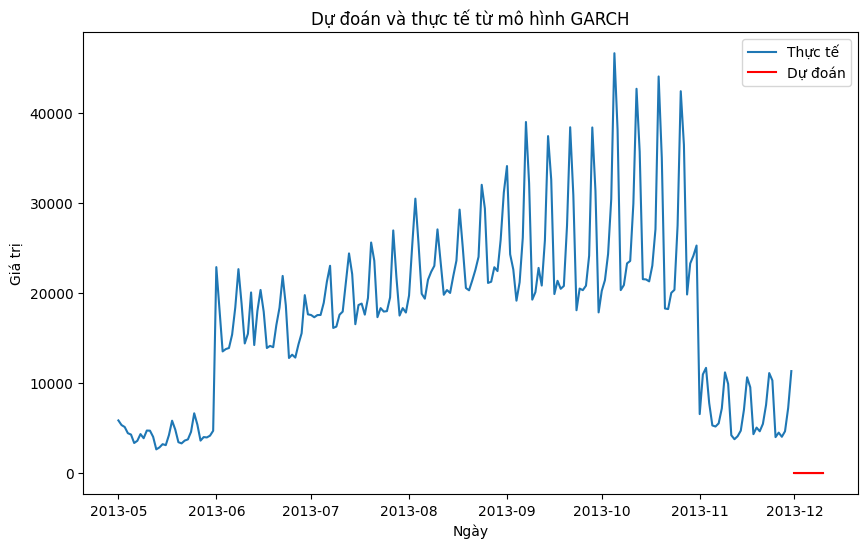

In [42]:

# Lấy dự đoán và độ lệch chuẩn của dự đoán
forecast_values = forecasts.mean.iloc[-1]
forecast_std_dev = forecasts.residual_variance.iloc[-1]

# Tạo ngày cho dự đoán
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='D')[1:]

# Vẽ biểu đồ so sánh giữa dự đoán và giá trị thực tế
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['truong_1'], label='Thực tế')
plt.plot(forecast_dates, forecast_values, color='red', label='Dự đoán')
plt.fill_between(forecast_dates, forecast_values - 1.96 * forecast_std_dev, forecast_values + 1.96 * forecast_std_dev, color='red', alpha=0.2)
plt.title('Dự đoán và thực tế từ mô hình GARCH')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.legend()
plt.show()